<a href="https://colab.research.google.com/github/09eesx/Medical/blob/main/Veri_analizi_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VERİ ANALİZİ

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
dosya_adi = "insurance.csv"
dosya_yolu = os.path.join("/content/drive/My Drive/", dosya_adi)
dosya_yolu

'/content/drive/My Drive/insurance.csv'

In [ ]:
import pandas as pd
veri = pd.read_csv("/content/drive/My Drive/insurance.csv")
veri.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
veri.isna()
#veride boş veri olup olmadığını gösterir.

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
df= veri.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:

#integer veriyi kategorik veriye dönüştürme
df["smoker"] = df["smoker"].astype("category")
df["sex"] = df["sex"].astype("category")
df["region"] = df["region"].astype("category")

In [ ]:

#bmi verisinin normal dağılıma uyup uymadığını kontrol eder.
#çarpıklık, basıklık
from scipy import stats

m = df.bmi

print(f"Skewness: {stats.skew(m)} Kurtosis: {stats.kurtosis(m)}")

Skewness: 0.28372857291709386 Kurtosis: -0.05502310583700032


In [ ]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

<Axes: >

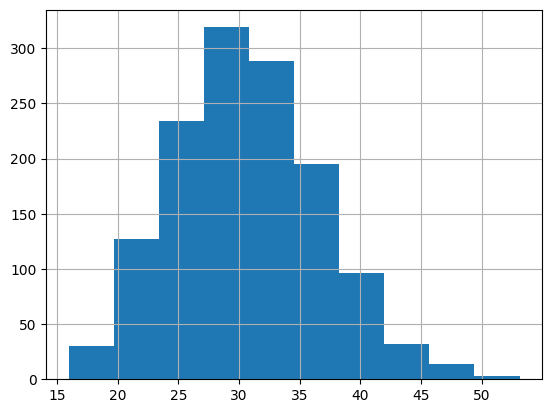

In [ ]:
df["bmi"].hist()
#bmi verisinin normal dağılıma uyup uymadığını görselleştirerek tespit etme

<Axes: xlabel='bmi', ylabel='Count'>

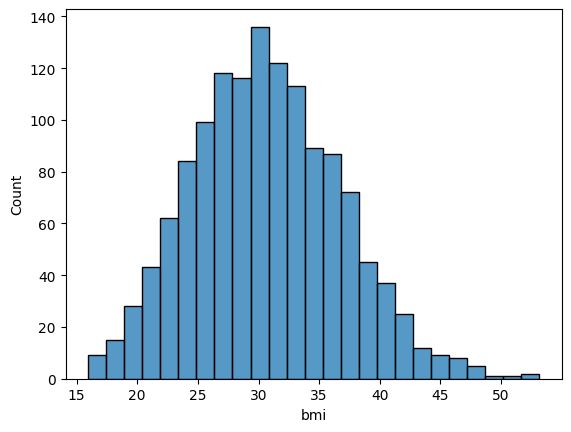

In [ ]:
sns.histplot(data = df["bmi"])
#bmi normalleştirme

<Axes: xlabel='bmi', ylabel='Density'>

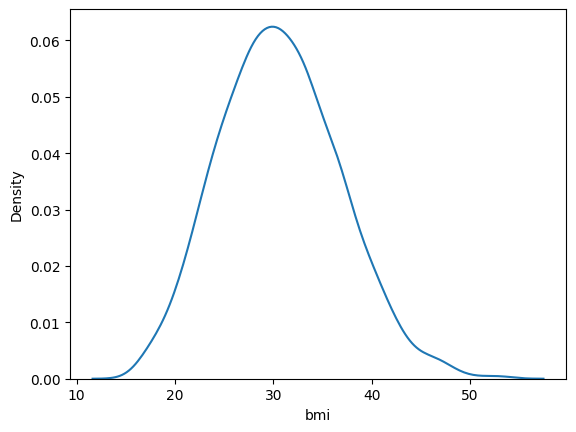

In [ ]:
sns.kdeplot(data = df["bmi"])
#bmi normalliğe uygun mudur
#yatkınlığı var ancak genel olarak dengeli bir veri

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([15.96 , 16.815, 16.815, ..., 50.38 , 52.58 , 53.13 ])),
 (6.091222472679125, 30.66339686098655, 0.997081328942097))

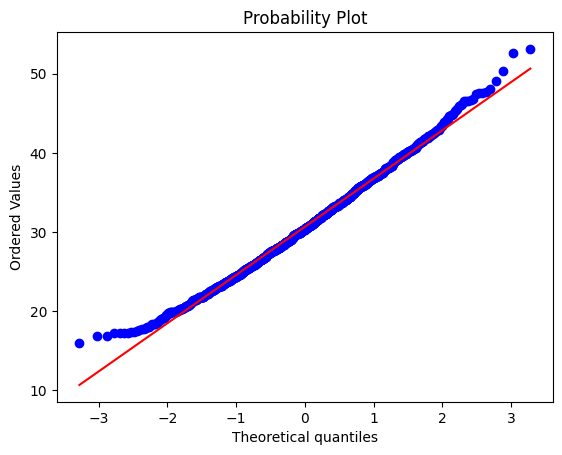

In [ ]:
#aykırı değer tespit, bmi
from scipy import stats
stats.probplot(df["bmi"], dist = "norm", plot = plt)

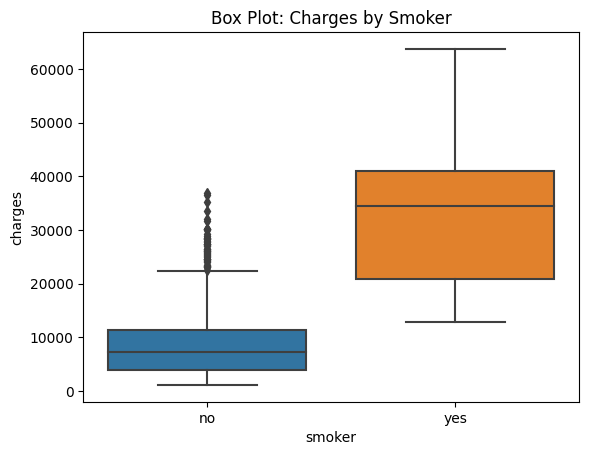

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#smoker-charges arasındaki ilişki
# Box plot oluşturma
sns.boxplot(x='smoker', y='charges', data=df)
plt.xlabel("smoker")
plt.ylabel("charges")
plt.title("Box Plot: Charges by Smoker")
plt.show()

#grafik sonucu smoker ile charges arasında net bir ilişki olduğu görülebilir.

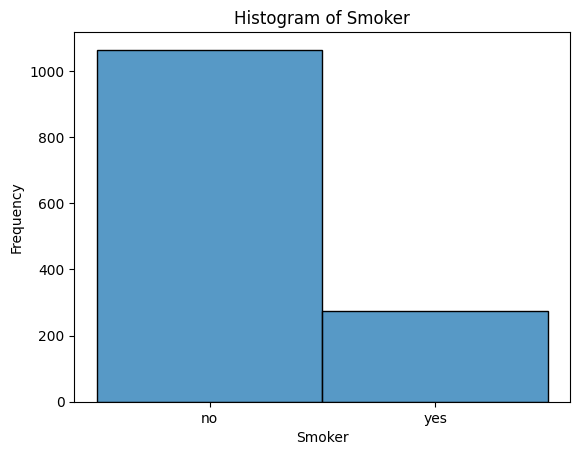

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#smoker verisinin kendi içinde dağılımı
#dengeli değil

# Histogram oluşturma
sns.histplot(data=df, x='smoker', bins=2, kde=False)
plt.xlabel("Smoker")
plt.ylabel("Frequency")
plt.title("Histogram of Smoker")
plt.show()

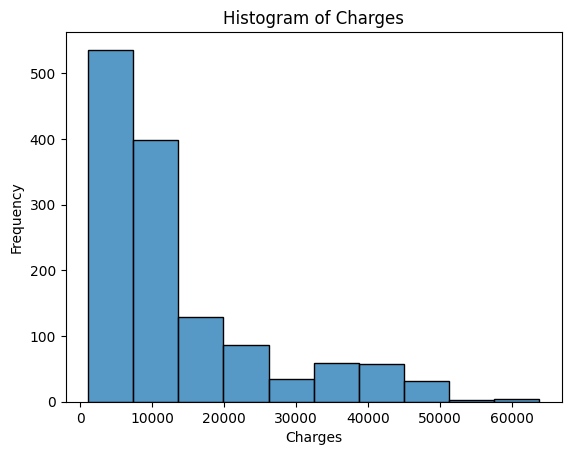

In [ ]:
sns.histplot(data=df, x='charges', bins=10)  # Örneğin 10 çubuklu bir histogram
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of Charges")
plt.show()

In [ ]:
df["region"].unique()
#region verisinin kategorik olup olmadığını kontrol etme

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

In [ ]:
df["region"].value_counts()
#unique değerleri sayma

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

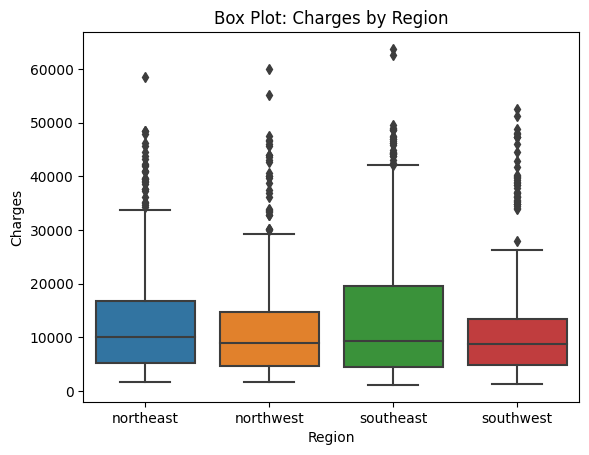

In [ ]:
# Box plot oluşturma
sns.boxplot(data=df, x='region', y='charges')
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Box Plot: Charges by Region")
plt.show()

#region ve charges arasındaki ilişki
#bölgenin charges ile ilişkisi önemsiz

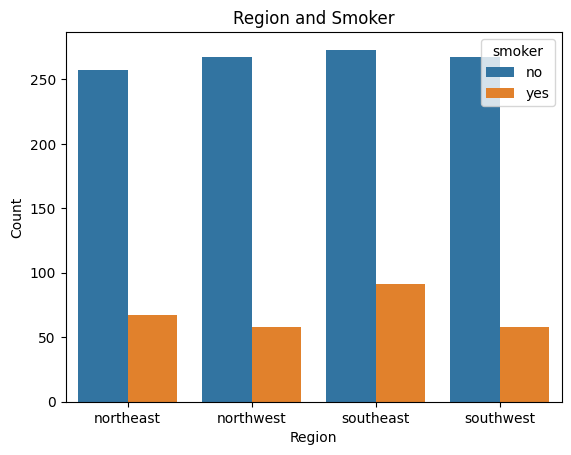

In [ ]:

#region ile smoker arasındaki ilişki
#hue parametresiyle smoker belli edilir
# Bar plot oluşturma
sns.countplot(data=df, x='region', hue='smoker')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region and Smoker")
plt.show()

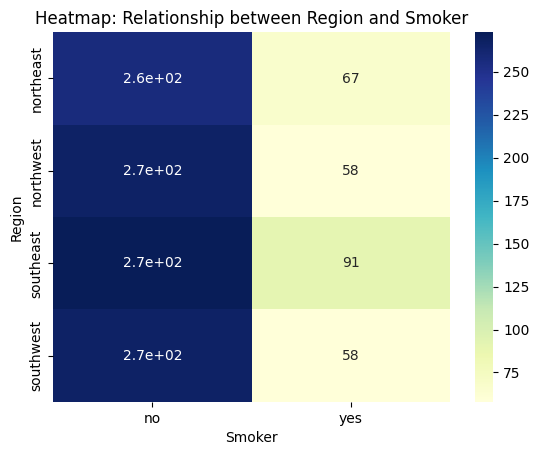

In [ ]:
cross_tab = pd.crosstab(df['region'], df['smoker'])

# Heatmap oluşturma
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
#annot kutular üzerine sayısal değerler yazılsın mı
plt.xlabel("Smoker")
plt.ylabel("Region")
plt.title("Heatmap: Relationship between Region and Smoker")
plt.show()

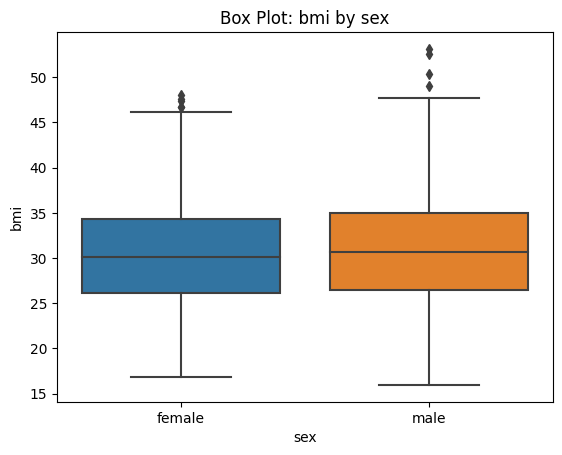

In [ ]:
sns.boxplot(x='sex', y='bmi', data=df)
plt.xlabel("sex")
plt.ylabel("bmi")
plt.title("Box Plot: bmi by sex")
plt.show()
#sex ve bmi arasındaki ilişki
#normal gözüküyor

In [ ]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:

# Veri setindeki en yüksek çocuk sayısına sahip bölgeyi bulma
max_children_region = df.groupby("region")["children"].sum().idxmax()
print("En fazla çocuğa sahip bölge:", max_children_region)

En fazla çocuğa sahip bölge: southeast


In [ ]:
# Her bölge için ortalama çocuk sayısını hesaplama
average_children_by_region = df.groupby("region")["children"].mean()
print(average_children_by_region)

region
northeast    1.046296
northwest    1.147692
southeast    1.049451
southwest    1.141538
Name: children, dtype: float64


In [ ]:
# Her bölge için toplam çocuk sayısını hesaplama
total_children_by_region = df.groupby("region")["children"].sum()
print(total_children_by_region)

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64


In [ ]:
sns.barplot(x="region", y=total_children_by_region.index, data=total_children_by_region.reset_index())
plt.xlabel("Bölgeler")
plt.ylabel("Toplam Çocuk Sayısı")
plt.title("Bar Plot: Total Children by Region")
plt.show()
#bölgelerdeki çocuk sayısının barplot ile görselleştirilmesi

TypeError: ignored

In [ ]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [ ]:


#İlişki zayıf
# Pearson Korelasyon Katsayısı hesaplaması
correlation = df['bmi'].corr(df['age'])

print("Pearson Korelasyon Katsayısı:", correlation)

Pearson Korelasyon Katsayısı: 0.10927188154853519


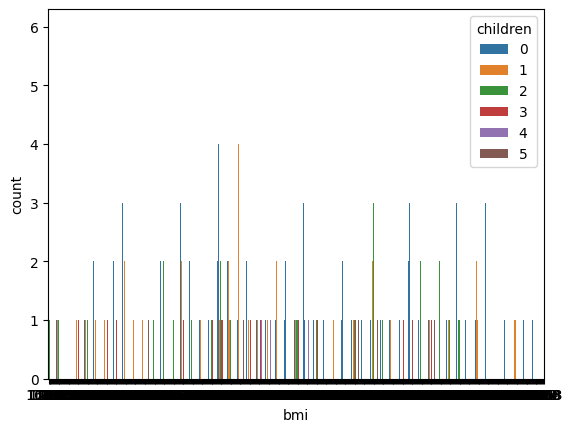

In [ ]:
sns.countplot(data=df, x='bmi', hue='children')
plt.show()
#bmi ve childeren arasındaki ilişki.
#grafik yorumlanamadı

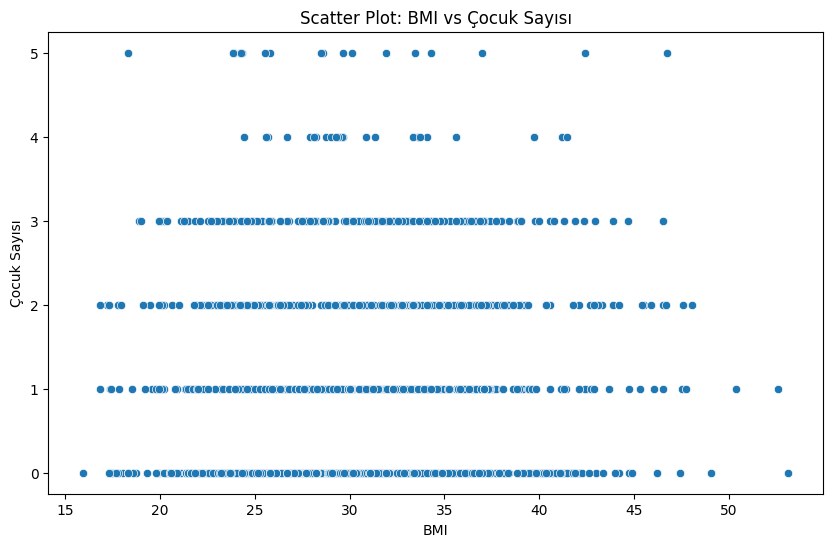

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='children')
plt.xlabel("BMI")
plt.ylabel("Çocuk Sayısı")
plt.title("Scatter Plot: BMI vs Çocuk Sayısı")
plt.show()
#bmi ile children arasındaki ilişki.
# bmi (17,45) arasında değişiyor.
#çocuk sayısı da genel olarak (0, 4) arasında değişiyor.
#veride dikkat çeken bir ilişki yok

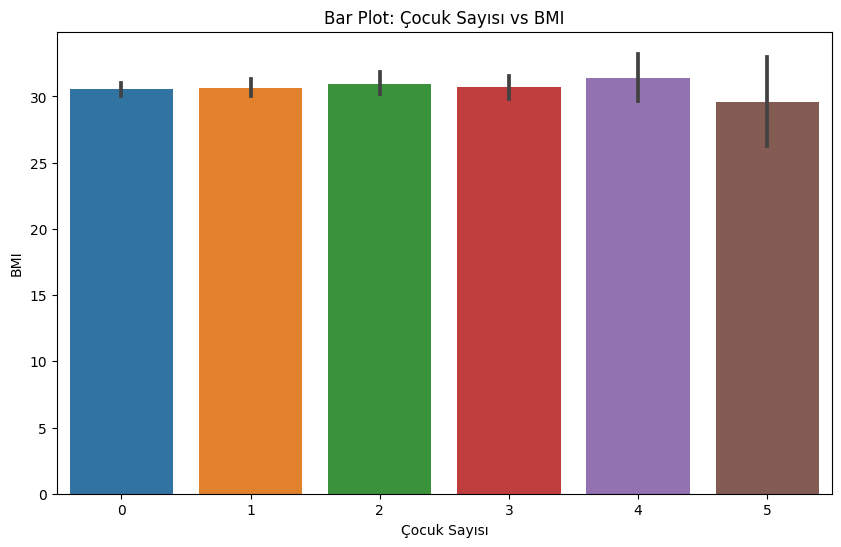

In [ ]:

# Bar plot çizimi
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='children', y='bmi')
plt.xlabel("Çocuk Sayısı")
plt.ylabel("BMI")
plt.title("Bar Plot: Çocuk Sayısı vs BMI")
plt.show()

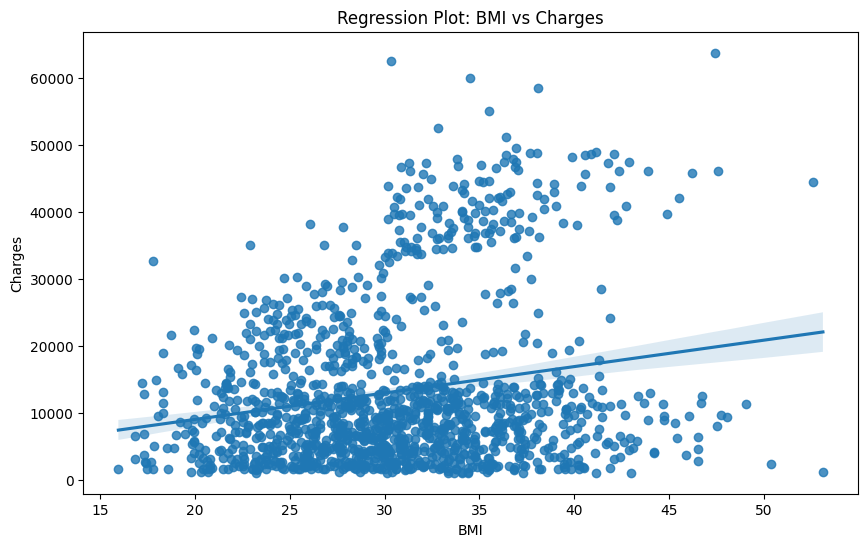

In [ ]:

# Regresyon çizgili scatter plot çizimi
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='bmi', y='charges')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Regression Plot: BMI vs Charges")
plt.show()
#charges ve bmi arasındaki ilişki

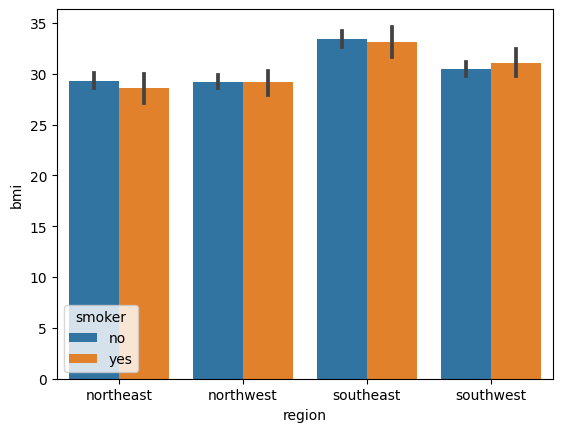

In [ ]:
sns.barplot(data=df, x= "region", y="bmi", hue= "smoker")
plt.show()
#region, smoker ve bmi arasındaki ilişki
#dengeli

In [ ]:

#box plotta kullanılan çeyreklik değerleri
#aykırı değerin varlığını tespit eder
Q1 = df.bmi.quantile(0.25)
Q2 = df.bmi.quantile(0.5)
Q3 = df.bmi.quantile(0.75)
Q4 = df.bmi.quantile(1)
IQR = Q3 - Q1

print("Q1-->", Q1)
print("Q3-->", Q3)
print("Q2-->", Q2)
print("Q4-->", Q4)
print("IQR-->", IQR)
print("Alt sınır: Q1 - 1.5 * IQR--->", Q1 - 1.5 * IQR)
print("Üst sınır: Q3 + 1.5 * IQR--->", Q3 + 1.5 * IQR)

Q1--> 26.29625
Q3--> 34.69375
Q2--> 30.4
Q4--> 53.13
IQR--> 8.3975
Alt sınır: Q1 - 1.5 * IQR---> 13.7
Üst sınır: Q3 + 1.5 * IQR---> 47.290000000000006


<ipython-input-47-a62aa15fd3c8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),annot = True, cmap = "cool")


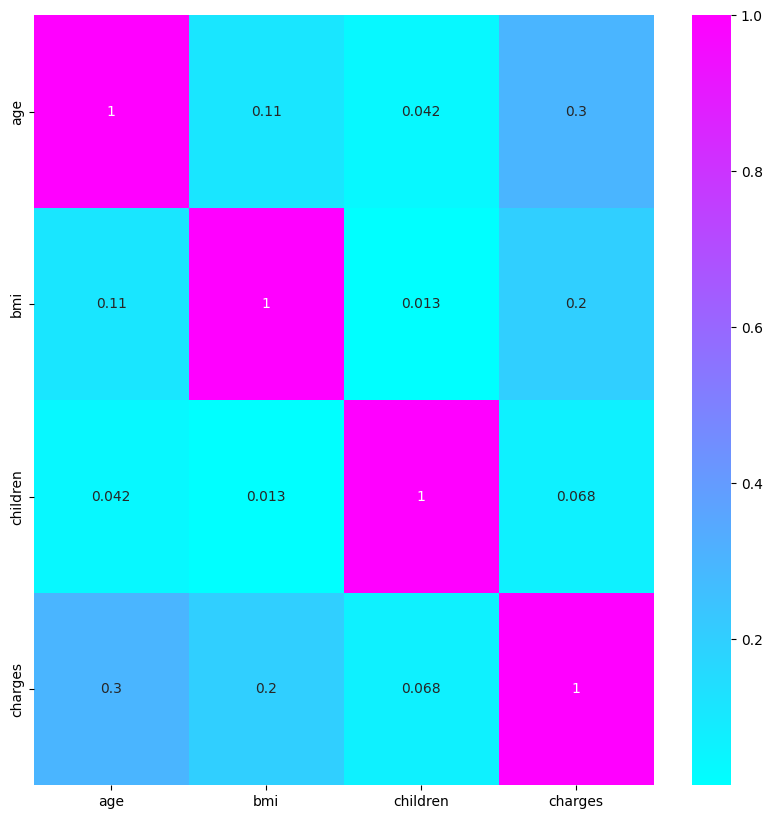

In [ ]:

#heatmapp grafiği ile her özelliğin ikili korelasyonunu gösterir.
f, ax = plt.subplots(1, 1, figsize = (10, 10))
ax = sns.heatmap(df.corr(),annot = True, cmap = "cool")

Data Preprocessing /
Model Selection /
Hiper Parametre Optimizasyon /
Model Evaluation

In [ ]:
#gerekli kütüphaneler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= veri.copy()

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([15.96 , 16.815, 16.815, ..., 50.38 , 52.58 , 53.13 ])),
 (6.091222472679125, 30.66339686098655, 0.997081328942097))

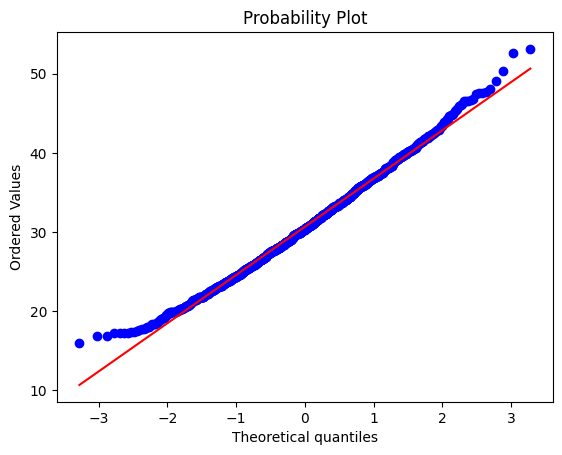

In [ ]:
#normal dağılıma uygun olup olmadığını araştırma
from scipy import stats
#bmi için
stats.probplot(df["bmi"], dist = "norm", plot = plt)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([18, 18, 18, ..., 64, 64, 64])),
 (13.691231670122331, 39.20702541106129, 0.9727343971101687))

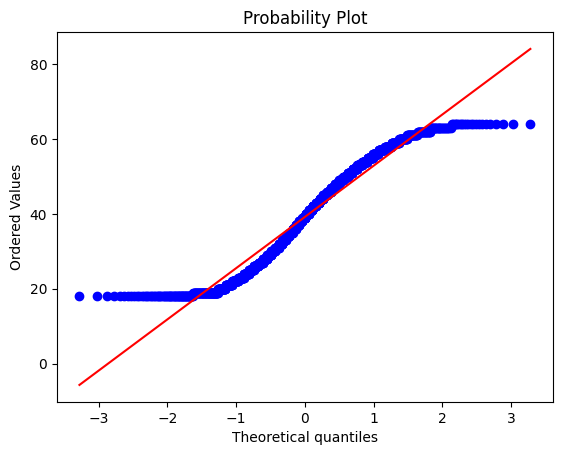

In [ ]:
#age için
stats.probplot(df["age"], dist = "norm", plot = plt)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 60021.39897,
         62592.87309, 63770.42801])),
 (10952.462526491305, 13270.422265141258, 0.9028052656368237))

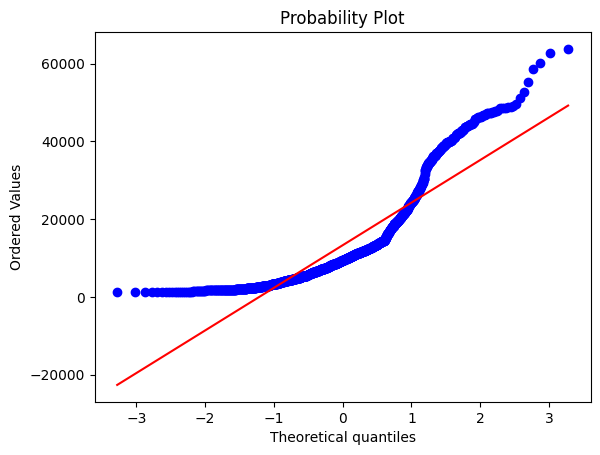

In [ ]:
#charges için
stats.probplot(df["charges"], dist = "norm", plot = plt)

In [ ]:
print("Elde edilen regresyon modeli: Y={}+{}X".format(lineer_regresyon.intercept_,lineer_regresyon.coef_[0]))
Lin_reg.coef_

In [ ]:
#sayısal kategorik veriye label encoder ile dönüştürme
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["region"]= le.fit_transform(df["region"])
df["smoker"] = le.fit_transform(df["smoker"])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Örnek bir veri seti oluşturma
X = df.drop('charges', axis= 1)
y = df["charges"]
X=X.values
y=y.values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler sınıfını kullanarak veriyi standart ölçeklendirme
scaler = StandardScaler()
X_train= scaler.fit_transform(x_train)
X_test= scaler.transform(x_test)

#veriyi basit regresyon kullanarak eğitme
from sklearn.linear_model import LinearRegression
Lin_reg= LinearRegression()
lineer_regresyon = Lin_reg.fit(X_train, y_train)

tahmin= Lin_reg.predict(X_test)

R^2 Skoru: 0.7833463107364537
Ortalama Kare Hata (MSE): 33635210.431178436
Ortalama Mutlak Hata (MAE): 4186.508898366437


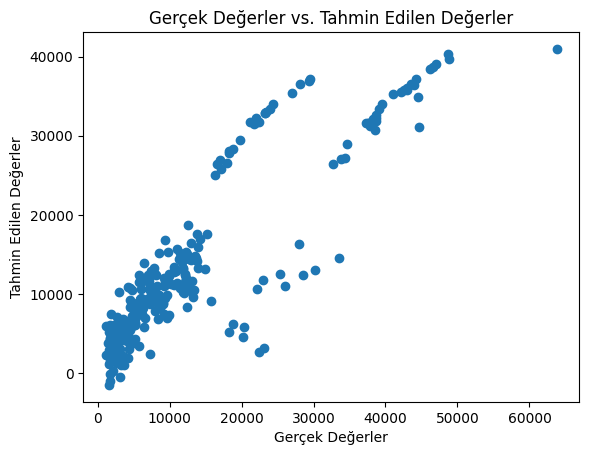

In [ ]:
#Linear Regresyon tahmin iyiliği istatiksel analizi
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R^2 skoru (Daha yüksek değer daha iyi bir uyum anlamına gelir)
r2 = r2_score(y_test, tahmin)
print("R^2 Skoru:", r2)

# Ortalama Kare Hata (MSE) (Daha düşük değer daha iyi bir uyum anlamına gelir)
mse = mean_squared_error(y_test, tahmin)
print("Ortalama Kare Hata (MSE):", mse)

# Ortalama Mutlak Hata (MAE) (Daha düşük değer daha iyi bir uyum anlamına gelir)
mae = mean_absolute_error(y_test, tahmin)
print("Ortalama Mutlak Hata (MAE):", mae)

# Tahminlerin gerçek değerlerle karşılaştırıldığı scatter plot
plt.scatter(y_test, tahmin)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler vs. Tahmin Edilen Değerler")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
#linear model türüdür
#regresyon katsayılarını sınırlandıraral overfittingi önler
ridge_reg = Ridge(alpha=1.0)  # Alpha parametresi düzenlileştirme gücünü kontrol eder
ridge_reg.fit(X_train, y_train)
tahmin_ridge = ridge_reg.predict(X_test)

R^2 Skoru: 0.7833037457661385
Ortalama Kare Hata (MSE): 33641818.58882586
Ortalama Mutlak Hata (MAE): 4187.971685427721


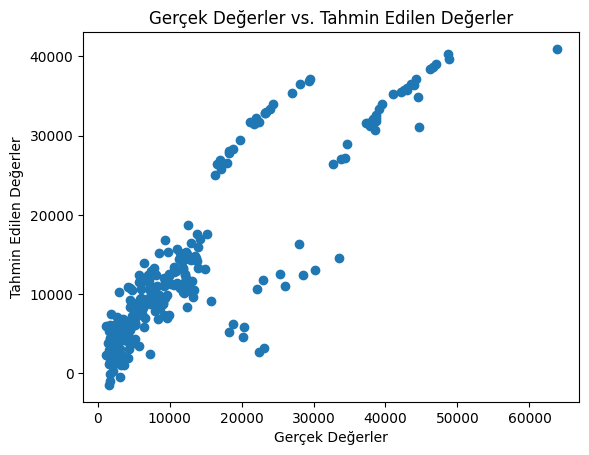

In [ ]:
#Ridge için r^2 score, mse, mae değerleri

r2 = r2_score(y_test, tahmin_ridge)
print("R^2 Skoru:", r2)

mse = mean_squared_error(y_test, tahmin_ridge)
print("Ortalama Kare Hata (MSE):", mse)

mae = mean_absolute_error(y_test, tahmin_ridge)
print("Ortalama Mutlak Hata (MAE):", mae)

plt.scatter(y_test, tahmin_ridge)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler vs. Tahmin Edilen Değerler")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
#Ridge gibi modeli genelleştirme üzerine çalışır
#Fark olarak L1 düzenlemesini seçer.
#(genellikle L2 düzenlemesi kullanılır.)
lasso_reg = Lasso(alpha=0.01)  # Alpha parametresi düzenlileştirme gücünü kontrol eder
lasso_reg.fit(X_train, y_train)
tahmin_lasso= lasso_reg.predict(X_test)

R^2 Skoru: 0.7833461418412857
Ortalama Kare Hata (MSE): 33635236.65193902
Ortalama Mutlak Hata (MAE): 4186.509994456114


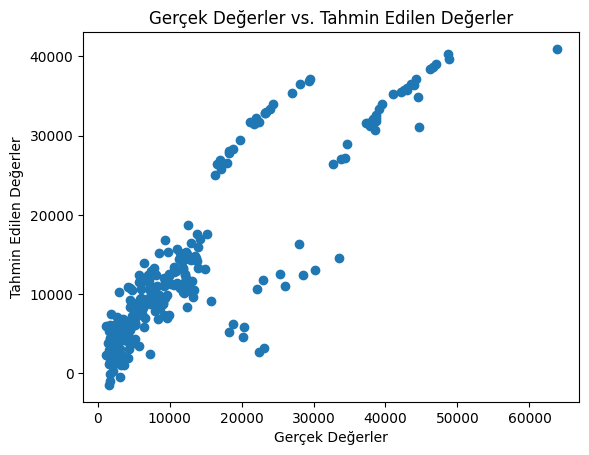

In [ ]:
#Lasso için r2 score, mse ve mae değerleri
r2 = r2_score(y_test, tahmin_lasso)
print("R^2 Skoru:", r2)

mse = mean_squared_error(y_test, tahmin_lasso)
print("Ortalama Kare Hata (MSE):", mse)

mae = mean_absolute_error(y_test, tahmin_lasso)
print("Ortalama Mutlak Hata (MAE):", mae)

plt.scatter(y_test, tahmin_ridge)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler vs. Tahmin Edilen Değerler")
plt.show()

In [ ]:
#model çaprazlama
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k)
#Verinin k parçaya bölünmesi ve her verinin sırasıyla hem test hem train olmasını sağlar.
#overfittingi azaltıe.

In [ ]:
#verinin test ve train olarak ayrılması
for train_index, test_index in kf.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

In [ ]:
#veri dönüşümü (scaledscaler)
Train_data= scaler.fit_transform(train_data)
Test_data = scaler.transform(test_data)
Train_data = pd.DataFrame(Train_data)
Test_data = pd.DataFrame(Test_data)

In [ ]:
#karar ağacı modeli
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(max_depth= 4)
dtc.fit(X_train,y_train)
tahmin_karar = dtc.predict(X_test)

In [ ]:
#karar ağacı modeli için mse, mae, r2 değerleei
r2 = r2_score(y_test, tahmin_karar)
print("R^2 Skoru:", r2)

mse = mean_squared_error(y_test, tahmin_karar)
print("Ortalama Kare Hata (MSE):", mse)

mae = mean_absolute_error(y_test, tahmin_karar)
print("Ortalama Mutlak Hata (MAE):", mae)

plt.scatter(y_test, tahmin_karar)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler vs. Tahmin Edilen Değerler")
plt.show()

In [ ]:
#random forest modeli
#karar ağaçlarından birden fazla olup orman oluşturulması
from sklearn.ensemble import RandomForestRegressor
#10 tane agac cizecek
#her veri için yeni deger verebilme ozelligine sahip

r_fr = RandomForestRegressor(n_estimators=10,random_state=0)
r_fr.fit(X_train, y_train)
tahmin_rf= r_fr.predict(X_test)

R^2 Skoru: 0.8592346763914649
Ortalama Kare Hata (MSE): 21853637.92825408
Ortalama Mutlak Hata (MAE): 2424.408932438433


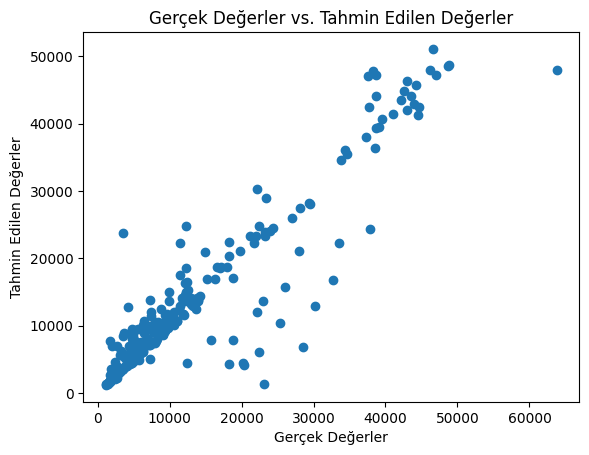

In [ ]:
# random forest için r2 score, mse, mae değerleri
r2 = r2_score(y_test, tahmin_rf)
print("R^2 Skoru:", r2)

mse = mean_squared_error(y_test, tahmin_rf)
print("Ortalama Kare Hata (MSE):", mse)

mae = mean_absolute_error(y_test, tahmin_rf)
print("Ortalama Mutlak Hata (MAE):", mae)

plt.scatter(y_test, tahmin_rf)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler vs. Tahmin Edilen Değerler")
plt.show()

In [ ]:
#random forest için en uygun hiper parametre değerlerini bulur.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [ ]:
print("En iyi parametreler:", best_params)
print("En iyi modeller:", best_model)

In [ ]:
#verilen hiperparametrelerle yeniden eğitim ve tahmin
R_fr=RandomForestRegressor(max_depth=20,min_samples_split=10,n_estimators=200)
R_fr.fit(X_train, y_train)
tahminp= R_fr.predict(X_test)

R_fr.fit(X_train, y_train)
tahminp= R_fr.predict(X_test)

R^2 Skoru: 0.8706841011257734
Ortalama Kare Hata (MSE): 20076129.26194213
Ortalama Mutlak Hata (MAE): 2493.601279485739


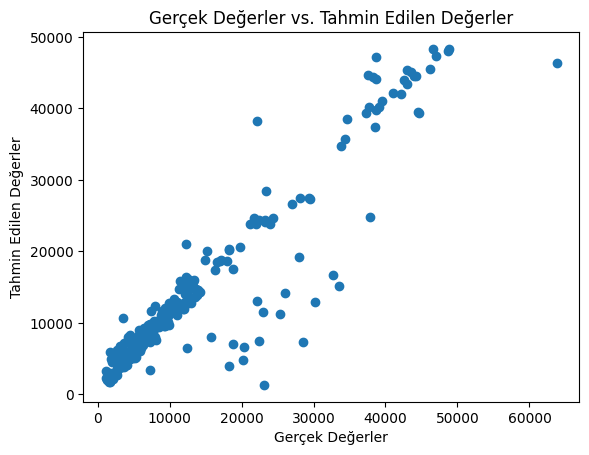

In [ ]:
#random forest için r^2 score, mse ve mae değerleri
r2 = r2_score(y_test, tahminp)
print("R^2 Skoru:", r2)

mse = mean_squared_error(y_test, tahminp)
print("Ortalama Kare Hata (MSE):", mse)

mae = mean_absolute_error(y_test, tahminp)
print("Ortalama Mutlak Hata (MAE):", mae)

plt.scatter(y_test, tahminp)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek Değerler vs. Tahmin Edilen Değerler")
plt.show()